# Gradient Boosting

[![Index](https://img.shields.io/badge/Index-blue)](../index.ipynb)
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/digillia/Digillia-Colab/blob/main/algorithms/gradient-boosting.ipynb)

In [38]:
# Supprimer les commentaires pour installer
# !pip3 install -U 'lightgbm[scikit-learn]' # On macOS, check https://github.com/microsoft/LightGBM/issues/6035
# !pip3 install -q -U matplotlib
# !pip3 install -q -U mlxtend
# !pip3 install -q -U scikit-learn
# !pip3 install -q -U xgboost

## Données

Création d'un jeu de données synthétiques:

In [39]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

random_state=123

X, y = make_classification(
    n_features=2,
    n_samples=500,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=2,
    weights=None,
    flip_y=0.01,
    class_sep=.9,
    hypercube=True,
    shift=0.0,
    scale=1.0,
    shuffle=True,
    random_state=random_state,
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Check shapes
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(400, 2) (100, 2) (400,) (100,)


Visualisation:

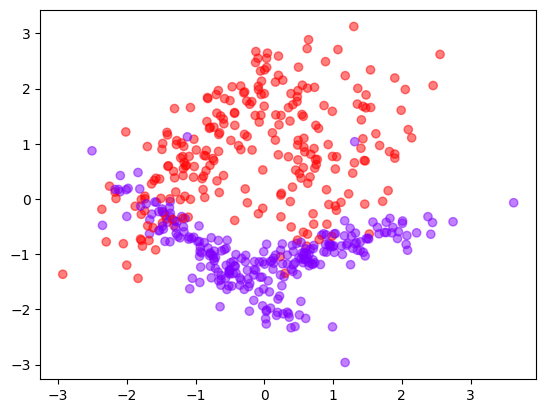

In [40]:
import matplotlib.pyplot as plt 
%matplotlib inline

plt.scatter(X[:,0], X[:,1], alpha=0.5, c=y, cmap=plt.cm.rainbow)

## Gradient Boosting with SciKit-Learn

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

clf = GradientBoostingClassifier(n_estimators=50, max_depth=2, learning_rate=0.05, random_state=random_state)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Train accuracy:", accuracy_score(y_train, clf.predict(X_train)))
print("Test accuracy:", accuracy_score(y_test, clf.predict(X_test)))

Train accuracy: 0.9325
Test accuracy: 0.88


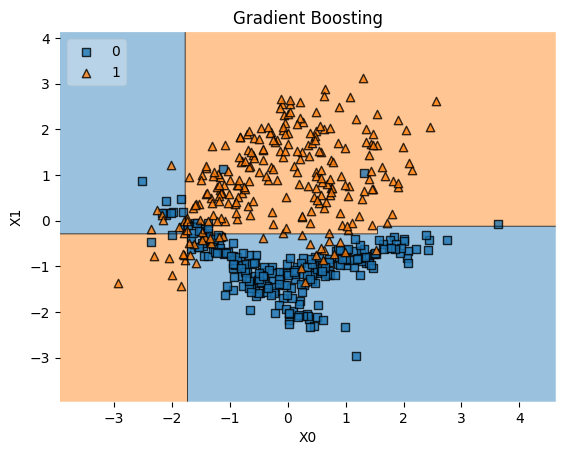

In [42]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y, clf=clf, legend=2) # X_highlight=X_test)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Gradient Boosting')
plt.show()

## Gradient Boosting with XGBoost

Docs: https://xgboost.readthedocs.io/en/stable/python/sklearn_estimator.html

In [43]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

clf = XGBClassifier(n_estimators=50, learning_rate=0.05, objective='binary:logistic', random_state=random_state)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Train accuracy:", accuracy_score(y_train, clf.predict(X_train)))
print("Test accuracy:", accuracy_score(y_test, clf.predict(X_test)))

Train accuracy: 0.9325
Test accuracy: 0.92


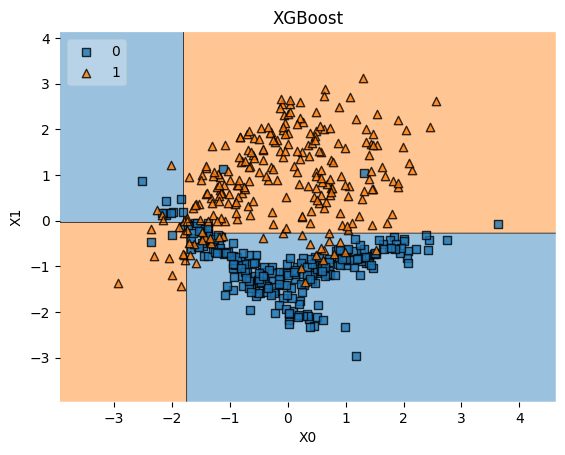

In [44]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y, clf=clf, legend=2) # X_highlight=X_test)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('XGBoost')
plt.show()

## Gradient Boosting with LightGBM

Docs: https://lightgbm.readthedocs.io/en/stable/pythonapi/lightgbm.LGBMClassifier.html

In [45]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

clf = LGBMClassifier(n_estimators=50, learning_rate=0.05, random_state=random_state)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Train accuracy:", accuracy_score(y_train, clf.predict(X_train)))
print("Test accuracy:", accuracy_score(y_test, clf.predict(X_test)))

[LightGBM] [Info] Number of positive: 192, number of negative: 208
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002243 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 269
[LightGBM] [Info] Number of data points in the train set: 400, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.480000 -> initscore=-0.080043
[LightGBM] [Info] Start training from score -0.080043
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

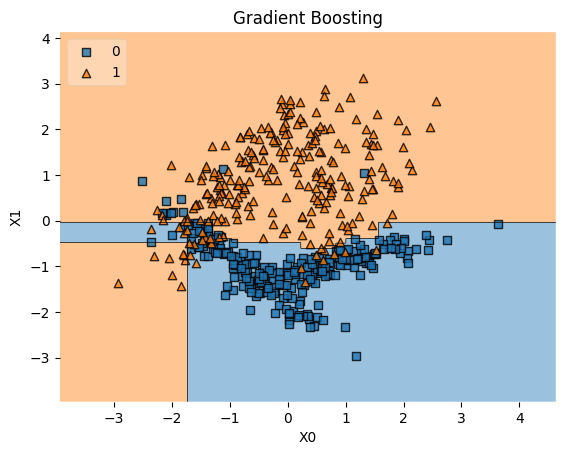

In [46]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y, clf=clf, legend=2) # X_highlight=X_test)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Gradient Boosting')
plt.show()